In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb


In [4]:
data = pd.read_csv("pima-data.csv")
data.info()
print("Missing Values:", data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_preg      768 non-null    int64  
 1   glucose_conc  768 non-null    int64  
 2   diastolic_bp  768 non-null    int64  
 3   thickness     768 non-null    int64  
 4   insulin       768 non-null    int64  
 5   bmi           768 non-null    float64
 6   diab_pred     768 non-null    float64
 7   age           768 non-null    int64  
 8   skin          768 non-null    float64
 9   diabetes      768 non-null    bool   
dtypes: bool(1), float64(3), int64(6)
memory usage: 54.9 KB
Missing Values: num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64


In [5]:
columns_to_impute = ['glucose_conc', 'diastolic_bp', 'insulin', 'bmi', 'skin']
for col in columns_to_impute:
    data[col] = data[col].replace(0, np.nan)
    data[col].fillna(data[col].mean(), inplace=True)


In [6]:
diabetes_map = {True: 1, False: 0}
data['diabetes'] = data['diabetes'].map(diabetes_map)
data

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148.0,72.0,35,155.548223,33.6,0.627,50,1.379000,1
1,1,85.0,66.0,29,155.548223,26.6,0.351,31,1.142600,0
2,8,183.0,64.0,0,155.548223,23.3,0.672,32,1.148645,1
3,1,89.0,66.0,23,94.000000,28.1,0.167,21,0.906200,0
4,0,137.0,40.0,35,168.000000,43.1,2.288,33,1.379000,1
...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180.000000,32.9,0.171,63,1.891200,0
764,2,122.0,70.0,27,155.548223,36.8,0.340,27,1.063800,0
765,5,121.0,72.0,23,112.000000,26.2,0.245,30,0.906200,0
766,1,126.0,60.0,0,155.548223,30.1,0.349,47,1.148645,1


In [9]:
feature_columns = ['num_preg', 'glucose_conc', 'diastolic_bp', 'insulin', 'bmi', 'diab_pred', 'age', 'skin']
X = data[feature_columns]
y = data['diabetes']
X,y

(     num_preg  glucose_conc  diastolic_bp     insulin   bmi  diab_pred  age  \
 0           6         148.0          72.0  155.548223  33.6      0.627   50   
 1           1          85.0          66.0  155.548223  26.6      0.351   31   
 2           8         183.0          64.0  155.548223  23.3      0.672   32   
 3           1          89.0          66.0   94.000000  28.1      0.167   21   
 4           0         137.0          40.0  168.000000  43.1      2.288   33   
 ..        ...           ...           ...         ...   ...        ...  ...   
 763        10         101.0          76.0  180.000000  32.9      0.171   63   
 764         2         122.0          70.0  155.548223  36.8      0.340   27   
 765         5         121.0          72.0  112.000000  26.2      0.245   30   
 766         1         126.0          60.0  155.548223  30.1      0.349   47   
 767         1          93.0          70.0  155.548223  30.4      0.315   23   
 
          skin  
 0    1.379000  
 1  

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
len(X_train),len(X_test)

(537, 231)

In [11]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
rf_predictions = random_forest_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))

Random Forest Accuracy: 0.7402597402597403
Confusion Matrix:
 [[120  31]
 [ 29  51]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.64      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



In [14]:
params = {
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [3, 4, 5],
    "min_child_weight": [1, 3, 5],
    "gamma": [0.0, 0.1, 0.2],
    "colsample_bytree": [0.3, 0.5, 0.7]
}

xgb_model = xgb.XGBClassifier()
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=params, scoring='accuracy', n_iter=10, cv=3, random_state=42)
random_search.fit(X_train, y_train)
best_xgb_model = random_search.best_estimator_
best_xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [15]:
xgb_predictions = best_xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_predictions))
print("Classification Report:\n", classification_report(y_test, xgb_predictions))

XGBoost Accuracy: 0.7489177489177489
Confusion Matrix:
 [[120  31]
 [ 27  53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.81       151
           1       0.63      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.72      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231



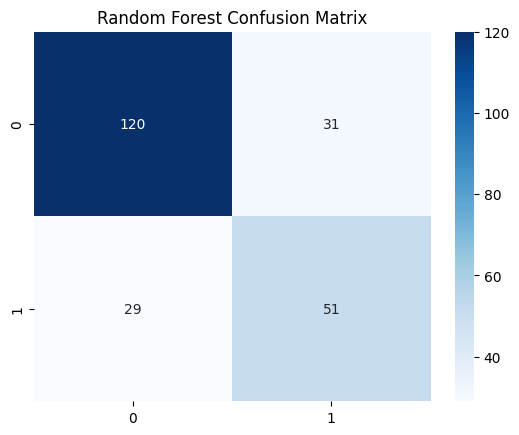

In [16]:
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()


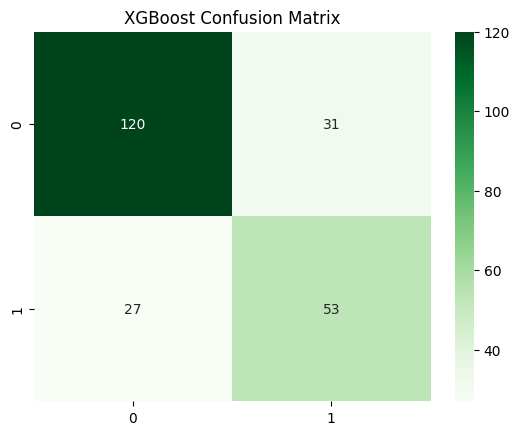

In [18]:
sns.heatmap(confusion_matrix(y_test, xgb_predictions), annot=True, fmt='d', cmap='Greens')
plt.title("XGBoost Confusion Matrix")
plt.show()


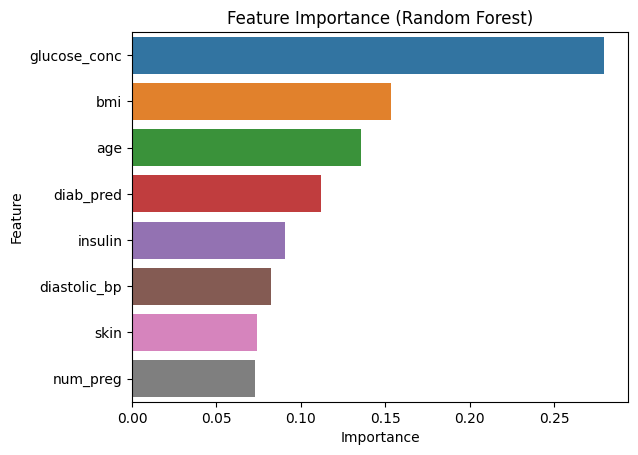

In [17]:
feature_importances = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': random_forest_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance (Random Forest)")
plt.show()


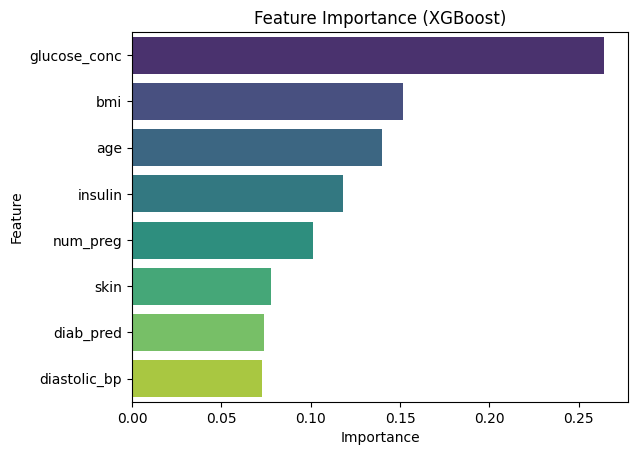

In [19]:
xgb_feature_importances = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': best_xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=xgb_feature_importances, palette='viridis')
plt.title("Feature Importance (XGBoost)")
plt.show()


In [20]:
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_predictions))

Random Forest Accuracy: 0.7402597402597403
XGBoost Accuracy: 0.7489177489177489


In [27]:
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)

print("Random Forest MSE:", rf_mse)
print("Random Forest RMSE:", rf_rmse)

Random Forest MSE: 0.2597402597402597
Random Forest RMSE: 0.5096471914376255


In [26]:
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)
print("XGBoost MSE:", xgb_mse)
print("XGBoost RMSE:", xgb_rmse)

XGBoost MSE: 0.2510822510822511
XGBoost RMSE: 0.5010810823432182
